# Iris Species Classification using Scikit-Learn

## Project Overview
This notebook demonstrates a complete machine learning workflow for classifying Iris flower species using Decision Tree Classifier. The Iris dataset contains measurements of sepal length, sepal width, petal length, and petal width for three species: Setosa, Versicolor, and Virginica.

**Learning Objectives:**
- Load and explore datasets using scikit-learn
- Perform data preprocessing and feature scaling
- Train and evaluate a Decision Tree Classifier
- Implement cross-validation for model validation
- Visualize model performance and decision boundaries

**Author:** Cindy Tumaini 


## 1. Import Libraries

In [18]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import numpy as np                    
import pandas as pd                   
import matplotlib.pyplot as plt       
import seaborn as sns                 
import os                             
import warnings                       

# Scikit-learn imports
from sklearn.datasets import load_iris                    
from sklearn.model_selection import (
    train_test_split,                                     
    cross_val_score,                                      
    cross_validate                                        
)
from sklearn.preprocessing import StandardScaler          
from sklearn.tree import (
    DecisionTreeClassifier,                               
    plot_tree                                             
)
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)
import os

## 2. Load and Explore Data

In [19]:
def load_and_explore_data():
    """
    Load the Iris dataset and perform exploratory data analysis.
    
    Returns:
        tuple: (X, y, iris, df) where X is features, y is target, 
               iris is the dataset object, and df is a pandas DataFrame
    """
    # Load the Iris dataset from scikit-learn
    iris = load_iris()
    
    # Extract features (X) and target (y)
    X = iris.data          # Shape: (150, 4) - 150 samples, 4 features
    y = iris.target        # Shape: (150,) - 150 target labels (0, 1, 2)
    
    # Create a comprehensive DataFrame for analysis
    df = pd.DataFrame(X, columns=iris.feature_names)
    df['target'] = y
    df['species'] = df['target'].map({
        0: iris.target_names[0],  # setosa
        1: iris.target_names[1],  # versicolor
        2: iris.target_names[2]   # virginica
    })
    
    # Display dataset information
    print(f"\n Dataset Shape: {df.shape}")
    print(f"   - Total Samples: {df.shape[0]}")
    print(f"   - Total Features: {len(iris.feature_names)}")
    print(f"   - Target Classes: {len(iris.target_names)}")
    
    print(f"\n Feature Names:")
    for i, feature in enumerate(iris.feature_names, 1):
        print(f"   {i}. {feature}")
    
    print(f"\n Target Classes:")
    for i, species in enumerate(iris.target_names):
        print(f"   {i}. {species.capitalize()}")
    
    print(f"\n Class Distribution:")
    class_counts = df['species'].value_counts()
    for species, count in class_counts.items():
        percentage = (count / len(df)) * 100
        print(f"   {species.capitalize()}: {count} samples ({percentage:.1f}%)")
    
    print(f"\n First 5 Rows of Dataset:")
    display(df.head())

    print(f"\n Statistical Summary:")
    display(df[iris.feature_names].describe())

    return X, y, iris, df

# Execute the function
X, y, iris, df = load_and_explore_data()


 Dataset Shape: (150, 6)
   - Total Samples: 150
   - Total Features: 4
   - Target Classes: 3

 Feature Names:
   1. sepal length (cm)
   2. sepal width (cm)
   3. petal length (cm)
   4. petal width (cm)

 Target Classes:
   0. Setosa
   1. Versicolor
   2. Virginica

 Class Distribution:
   Setosa: 50 samples (33.3%)
   Versicolor: 50 samples (33.3%)
   Virginica: 50 samples (33.3%)

 First 5 Rows of Dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



 Statistical Summary:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2.1 Data Quality Check

**Important:** This step checks for missing values, duplicates, and outliers, and cleans the data if issues are found.

C:\Users\Admin\AppData\Local\Temp\ipykernel_10492\2742560101.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=feature_data, x='Feature', y='Value', ax=ax2, palette='Set2')


 EDA visualizations saved to: outputs/eda_visualizations.png


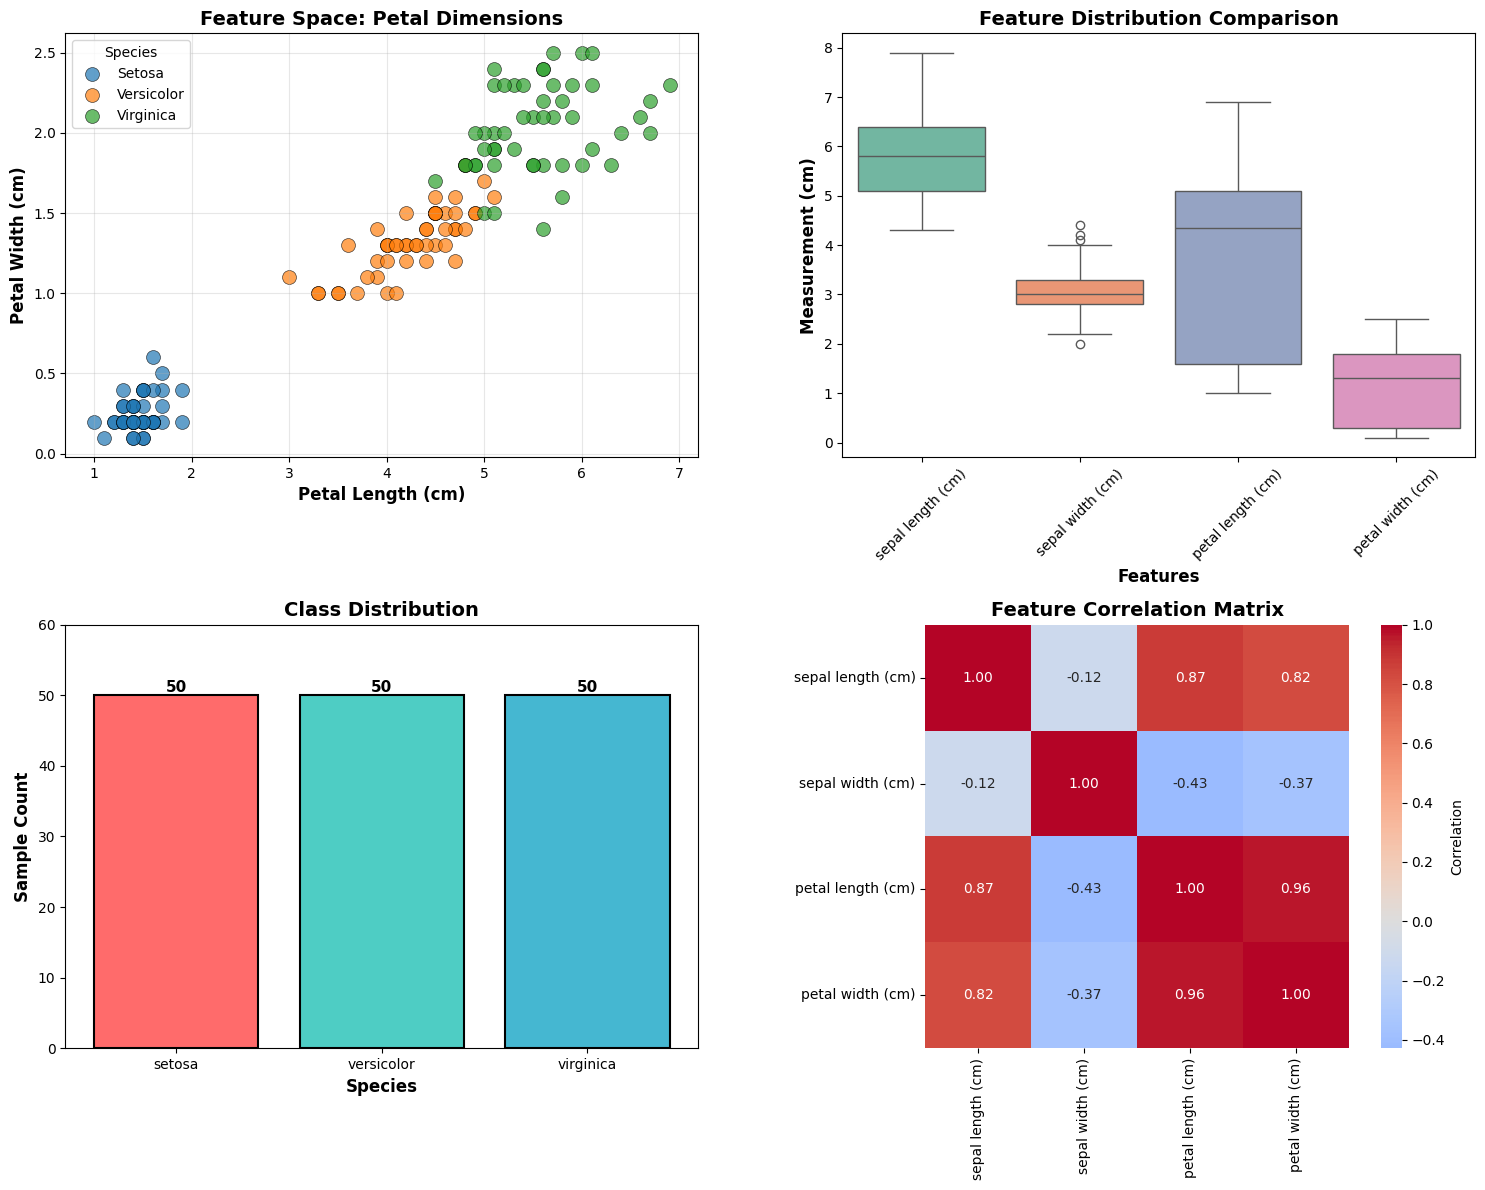

In [20]:
def visualize_data_distribution(df, iris):
    """
    Create comprehensive visualizations of the dataset.
    
    Args:
        df (pd.DataFrame): The Iris dataset as DataFrame
        iris: The iris dataset object
    """
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Pairplot-style scatter for two key features
    ax1 = axes[0, 0]
    for species_id, species_name in enumerate(iris.target_names):
        mask = df['target'] == species_id
        ax1.scatter(
            df.loc[mask, 'petal length (cm)'],
            df.loc[mask, 'petal width (cm)'],
            label=species_name.capitalize(),
            alpha=0.7,
            s=100,
            edgecolors='black',
            linewidth=0.5
        )
    ax1.set_xlabel('Petal Length (cm)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Petal Width (cm)', fontsize=12, fontweight='bold')
    ax1.set_title('Feature Space: Petal Dimensions', fontsize=14, fontweight='bold')
    ax1.legend(title='Species')
    ax1.grid(True, alpha=0.3)
    
    # 2. Feature distribution boxplot
    ax2 = axes[0, 1]
    feature_data = df[iris.feature_names].melt(var_name='Feature', value_name='Value')
    sns.boxplot(data=feature_data, x='Feature', y='Value', ax=ax2, palette='Set2')
    ax2.set_title('Feature Distribution Comparison', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Features', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Measurement (cm)', fontsize=12, fontweight='bold')
    ax2.tick_params(axis='x', rotation=45)
    
    # 3. Class distribution bar chart
    ax3 = axes[1, 0]
    class_counts = df['species'].value_counts()
    bars = ax3.bar(class_counts.index, class_counts.values, 
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1'],
                   edgecolor='black', linewidth=1.5)
    ax3.set_title('Class Distribution', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Species', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Sample Count', fontsize=12, fontweight='bold')
    ax3.set_ylim(0, max(class_counts.values) + 10)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # 4. Correlation heatmap
    ax4 = axes[1, 1]
    correlation_matrix = df[iris.feature_names].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, ax=ax4, cbar_kws={'label': 'Correlation'})
    ax4.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('outputs/eda_visualizations.png', dpi=300, bbox_inches='tight')
    print(" EDA visualizations saved to: outputs/eda_visualizations.png")
    plt.show()

# Generate visualizations
visualize_data_distribution(df, iris)

### 2.2 Exploratory Data Analysis Visualizations

In [21]:
def check_data_quality(df):
    """
    Check for missing values, duplicates, and data quality issues.
    Clean the data by removing duplicates and handling outliers.
    
    Args:
        df (pd.DataFrame): The dataset to check
    
    Returns:
        tuple: (cleaned_df, quality_metrics_dict)
    """
     
    # Create a copy to avoid modifying the original
    df_cleaned = df.copy()
    
    # Check for missing values
    missing_values = df_cleaned.isnull().sum()
    total_missing = missing_values.sum()
    
    print(f"\n Missing Values Check:")
    if total_missing == 0:
        print("    No missing values detected - dataset is complete!")
    else:
        print(f"   Total missing values: {total_missing}")
        print("\n   Missing values per column:")
        for col, count in missing_values[missing_values > 0].items():
            print(f"   - {col}: {count}")
    
    # Check for duplicate rows
    duplicates = df_cleaned.duplicated().sum()
    print(f"\n Duplicate Rows Check:")
    if duplicates == 0:
        print("   No duplicate rows found!")
    else:
        print(f"   Found {duplicates} duplicate rows")
        df_cleaned = df_cleaned.drop_duplicates()
        print("   Duplicate rows removed.")

    # Check data types
    print(f"\n Data Types:")
    for col, dtype in df_cleaned.dtypes.items():
        print(f"   {col}: {dtype}")
    
    # Check for outliers using IQR method
    print(f"\n Outlier Detection (IQR Method):")
    feature_cols = iris.feature_names
    outliers_replaced = 0
    
    for col in feature_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
        
        if len(outliers) > 0:
            print(f"   {col}: {len(outliers)} potential outliers")
            # Replace outlier values with the median
            median_value = df_cleaned[col].median()
            mask = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)
            df_cleaned.loc[mask, col] = median_value
            outliers_replaced += len(outliers)
            print(f"    Outliers in {col} replaced with median value: {median_value:.4f}")
        else:
            print(f"   {col}: No outliers detected")
    
    # Summary
    print(f"\n Data Quality Summary:")
    print(f"   Original samples:       {len(df)}")
    print(f"   Cleaned samples:        {len(df_cleaned)}")
    print(f"   Duplicates removed:     {duplicates}")
    print(f"   Outliers replaced:      {outliers_replaced}")
    print(f"   Missing values:         {total_missing}")
    
    quality_metrics = {
        'missing_values': total_missing,
        'duplicates': duplicates,
        'outliers_replaced': outliers_replaced,
        'original_samples': len(df),
        'cleaned_samples': len(df_cleaned)
    }
    
    return df_cleaned, quality_metrics

# Execute data quality check and get cleaned dataframe
df_cleaned, quality_metrics = check_data_quality(df)

print(f"\n Updating features (X) and target (y) with cleaned data...")
X = df_cleaned[iris.feature_names].values
y = df_cleaned['target'].values
print(f"   New X shape: {X.shape}")
print(f"   New y shape: {y.shape}")



 Missing Values Check:
    No missing values detected - dataset is complete!

 Duplicate Rows Check:
   Found 1 duplicate rows
   Duplicate rows removed.

 Data Types:
   sepal length (cm): float64
   sepal width (cm): float64
   petal length (cm): float64
   petal width (cm): float64
   target: int64
   species: object

 Outlier Detection (IQR Method):
   sepal length (cm): No outliers detected
   sepal width (cm): 4 potential outliers
    Outliers in sepal width (cm) replaced with median value: 3.0000
   petal length (cm): No outliers detected
   petal width (cm): No outliers detected

 Data Quality Summary:
   Original samples:       150
   Cleaned samples:        149
   Duplicates removed:     1
   Outliers replaced:      4
   Missing values:         0

 Updating features (X) and target (y) with cleaned data...
   New X shape: (149, 4)
   New y shape: (149,)


## 3. Data Preprocessing

**Why Preprocessing Matters:**
- **Train-Test Split**: Separates data to evaluate model on unseen data, preventing overfitting
- **Feature Scaling**: Standardization ensures all features contribute equally to the model
- **Encoding**: Though Iris targets are already numeric, we verify proper encoding

In [22]:
def preprocess_data(X, y, test_size=0.2, random_state=42):
    """
    Preprocess the data: split and standardize features.
    
    Args:
        X (np.ndarray): Feature matrix
        y (np.ndarray): Target vector
        test_size (float): Proportion of data for testing (default: 0.2)
        random_state (int): Random seed for reproducibility
    
    Returns:
        tuple: (X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler)
    """
      
    # Step 1: Split data into training and testing sets
    # This ensures we evaluate the model on data it hasn't seen during training
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,        # 20% for testing, 80% for training
        random_state=random_state,  # Ensures reproducible results
        stratify=y                  # Maintains class distribution in both sets
    )
    
    print(f"\n Data Split Summary:")
    print(f"   Training Set: {X_train.shape[0]} samples ({(1-test_size)*100:.0f}%)")
    print(f"   Testing Set:  {X_test.shape[0]} samples ({test_size*100:.0f}%)")
    print(f"   Feature Dimensions: {X_train.shape[1]}")
    
    # Verify stratification worked
    print(f"\n Class Distribution After Split:")
    unique, train_counts = np.unique(y_train, return_counts=True)
    _, test_counts = np.unique(y_test, return_counts=True)
    
    for i, class_name in enumerate(iris.target_names):
        train_pct = (train_counts[i] / len(y_train)) * 100
        test_pct = (test_counts[i] / len(y_test)) * 100
        print(f"   {class_name.capitalize()}: Train={train_counts[i]} ({train_pct:.1f}%), "
              f"Test={test_counts[i]} ({test_pct:.1f}%)")
    
    # Step 2: Feature Standardization (Z-score normalization)
    # Formula: z = (x - μ) / σ
    # This transforms features to have mean=0 and std=1
    
    print(f"\n Feature Standardization:")
    
    scaler = StandardScaler()
    
    # Fit scaler on training data and transform
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Transform test data using training statistics
    X_test_scaled = scaler.transform(X_test)
    
    print(f"\n Scaling Statistics (from training data):")
    for i, feature_name in enumerate(iris.feature_names):
        print(f"   {feature_name}:")
        print(f"      Mean:  {scaler.mean_[i]:.4f} → 0.0000 (after scaling)")
        print(f"      Std:   {scaler.scale_[i]:.4f} → 1.0000 (after scaling)")
    
    # Verify standardization
    print(f"\n Verification:")
    print(f"   Training data mean:  {X_train_scaled.mean(axis=0).round(10)}")
    print(f"   Training data std:   {X_train_scaled.std(axis=0).round(4)}")
    
    return X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler

# Execute preprocessing
X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler = preprocess_data(X, y)


 Data Split Summary:
   Training Set: 119 samples (80%)
   Testing Set:  30 samples (20%)
   Feature Dimensions: 4

 Class Distribution After Split:
   Setosa: Train=40 (33.6%), Test=10 (33.3%)
   Versicolor: Train=40 (33.6%), Test=10 (33.3%)
   Virginica: Train=39 (32.8%), Test=10 (33.3%)

 Feature Standardization:

 Scaling Statistics (from training data):
   sepal length (cm):
      Mean:  5.8622 → 0.0000 (after scaling)
      Std:   0.8406 → 1.0000 (after scaling)
   sepal width (cm):
      Mean:  3.0370 → 0.0000 (after scaling)
      Std:   0.3885 → 1.0000 (after scaling)
   petal length (cm):
      Mean:  3.7622 → 0.0000 (after scaling)
      Std:   1.7640 → 1.0000 (after scaling)
   petal width (cm):
      Mean:  1.1975 → 0.0000 (after scaling)
      Std:   0.7607 → 1.0000 (after scaling)

 Verification:
   Training data mean:  [-0.  0.  0.  0.]
   Training data std:   [1. 1. 1. 1.]


## 4. Model Training with Cross-Validation

**Decision Tree Classifier:**
- Non-parametric supervised learning algorithm
- Builds tree structure with decision nodes and leaf nodes
- Excellent for multi-class classification
- Interpretable and visualizable

In [23]:
def train_model_with_cv(X_train_scaled, y_train, cv_folds=5):
    """
    Train a Decision Tree Classifier with cross-validation.
    
    Args:
        X_train_scaled (np.ndarray): Scaled training features
        y_train (np.ndarray): Training labels
        cv_folds (int): Number of cross-validation folds
    
    Returns:
        DecisionTreeClassifier: Trained model
    """
        
    # Initialize Decision Tree Classifier with optimized hyperparameters
    clf = DecisionTreeClassifier(
        criterion='gini',          # Gini impurity for split quality
        max_depth=4,               # Limit tree depth to prevent overfitting
        min_samples_split=5,       # Minimum samples required to split a node
        min_samples_leaf=2,        # Minimum samples required at leaf node
        random_state=42            # For reproducibility
    )
    
    print(f"\n Decision Tree Configuration:")
    print(f"   Criterion: {clf.criterion}")
    print(f"   Max Depth: {clf.max_depth}")
    print(f"   Min Samples Split: {clf.min_samples_split}")
    print(f"   Min Samples Leaf: {clf.min_samples_leaf}")
    
    # Perform k-fold cross-validation BEFORE final training
    # This gives us a more robust estimate of model performance
    print(f"\n Performing {cv_folds}-Fold Cross-Validation...")
    print(f"   (Training {cv_folds} separate models on different data splits)")
    
    # Define multiple scoring metrics for comprehensive evaluation
    scoring = {
        'accuracy': 'accuracy',
        'precision_weighted': 'precision_weighted',
        'recall_weighted': 'recall_weighted',
        'f1_weighted': 'f1_weighted'
    }
    
    # Execute cross-validation
    cv_results = cross_validate(
        clf, 
        X_train_scaled, 
        y_train,
        cv=cv_folds,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1  # Use all CPU cores
    )
    
    # Display cross-validation results
    print(f"\n Cross-Validation Results ({cv_folds} folds):")
    print(f"   {'Metric':<25} {'Train Mean':<15} {'Test Mean':<15} {'Test Std':<15}")
     
    for metric_name in scoring.keys():
        train_scores = cv_results[f'train_{metric_name}']
        test_scores = cv_results[f'test_{metric_name}']
        
        print(f"   {metric_name.replace('_', ' ').title():<25} "
              f"{train_scores.mean():.4f}          "
              f"{test_scores.mean():.4f}          "
              f"±{test_scores.std():.4f}")
    
    # Check for overfitting
    train_acc = cv_results['train_accuracy'].mean()
    test_acc = cv_results['test_accuracy'].mean()
    overfitting_gap = train_acc - test_acc
    
    print(f"\n Overfitting Analysis:")
    print(f"   Training Accuracy:   {train_acc:.4f}")
    print(f"   Validation Accuracy: {test_acc:.4f}")
    print(f"   Gap:                 {overfitting_gap:.4f}")
    
    if overfitting_gap < 0.05:
        print("   Model generalizes well (gap < 0.05)")
    elif overfitting_gap < 0.10:
        print("   Slight overfitting detected (0.05 < gap < 0.10)")
    else:
        print("   Significant overfitting (gap > 0.10) - consider regularization")
    
    # Train final model on entire training set
    print(f"\n Training final model on entire training set...")
    clf.fit(X_train_scaled, y_train)
    print(f"   Model trained successfully!")
    print(f"   Tree depth achieved: {clf.get_depth()}")
    print(f"   Number of leaves: {clf.get_n_leaves()}")
    
    return clf

# Train the model
clf = train_model_with_cv(X_train_scaled, y_train, cv_folds=5)


 Decision Tree Configuration:
   Criterion: gini
   Max Depth: 4
   Min Samples Split: 5
   Min Samples Leaf: 2

 Performing 5-Fold Cross-Validation...
   (Training 5 separate models on different data splits)

 Cross-Validation Results (5 folds):
   Metric                    Train Mean      Test Mean       Test Std       
   Accuracy                  0.9811          0.9500          ±0.0312
   Precision Weighted        0.9820          0.9585          ±0.0246
   Recall Weighted           0.9811          0.9500          ±0.0312
   F1 Weighted               0.9811          0.9494          ±0.0317

 Overfitting Analysis:
   Training Accuracy:   0.9811
   Validation Accuracy: 0.9500
   Gap:                 0.0311
   Model generalizes well (gap < 0.05)

 Training final model on entire training set...
   Model trained successfully!
   Tree depth achieved: 3
   Number of leaves: 5

 Cross-Validation Results (5 folds):
   Metric                    Train Mean      Test Mean       Test Std       

## 5. Model Evaluation

Comprehensive evaluation using multiple metrics to assess model performance from different perspectives.

In [26]:
def evaluate_model(clf, X_test_scaled, y_test, iris):
    """
    Comprehensive model evaluation with multiple metrics.
    
    Args:
        clf: Trained classifier
        X_test_scaled (np.ndarray): Scaled test features
        y_test (np.ndarray): True test labels
        iris: Iris dataset object
    
    Returns:
        dict: Dictionary containing all evaluation metrics
    """
        
    # Make predictions on test set
    y_pred = clf.predict(X_test_scaled)
    
    # Also get prediction probabilities for each class
    y_pred_proba = clf.predict_proba(X_test_scaled)
    
    # Calculate core metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Display overall metrics
    print(f"\n Overall Performance Metrics:")
    print(f"   {'Metric':<20} {'Score':<10} {'Interpretation'}")
    print(f"   {'-'*70}")
    print(f"   {'Accuracy':<20} {accuracy:.4f}     Overall correctness rate")
    print(f"   {'Precision (weighted)':<20} {precision:.4f}     Positive prediction accuracy")
    print(f"   {'Recall (weighted)':<20} {recall:.4f}     True positive detection rate")
    print(f"   {'F1-Score (weighted)':<20} {f1:.4f}     Harmonic mean of precision & recall")
    
    # Display per-class metrics
    print(f"\n Per-Class Performance:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names, digits=4))
    
    # Detailed prediction analysis
    print(f"\n Prediction Analysis:")
    print(f"   Total test samples: {len(y_test)}")
    print(f"   Correct predictions: {(y_pred == y_test).sum()}")
    print(f"   Incorrect predictions: {(y_pred != y_test).sum()}")
    
    # Show misclassified samples if any
    misclassified_indices = np.where(y_pred != y_test)[0]
    if len(misclassified_indices) > 0:
        print(f"\n Misclassified Samples:")
        for idx in misclassified_indices:
            true_label = iris.target_names[y_test[idx]]
            pred_label = iris.target_names[y_pred[idx]]
            confidence = y_pred_proba[idx][y_pred[idx]] * 100
            print(f"   Sample {idx}: True={true_label}, Predicted={pred_label} "
                  f"(confidence: {confidence:.1f}%)")
    else:
        print(f"\n Perfect Classification! All samples correctly classified.")
    
    # Feature importance analysis
    print(f"\n Feature Importance:")
    feature_importance = clf.feature_importances_
    feature_importance_sorted = sorted(
        zip(iris.feature_names, feature_importance),
        key=lambda x: x[1],
        reverse=True
    )
    
    for feature, importance in feature_importance_sorted:
        bar_length = int(importance * 50)  # Scale to 50 characters max
        bar = '█' * bar_length
        print(f"   {feature:<30} {importance:.4f} {bar}")
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

# Evaluate the model
evaluation_results = evaluate_model(clf, X_test_scaled, y_test, iris)


 Overall Performance Metrics:
   Metric               Score      Interpretation
   ----------------------------------------------------------------------
   Accuracy             0.9667     Overall correctness rate
   Precision (weighted) 0.9697     Positive prediction accuracy
   Recall (weighted)    0.9667     True positive detection rate
   F1-Score (weighted)  0.9666     Harmonic mean of precision & recall

 Per-Class Performance:
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        10
  versicolor     1.0000    0.9000    0.9474        10
   virginica     0.9091    1.0000    0.9524        10

    accuracy                         0.9667        30
   macro avg     0.9697    0.9667    0.9666        30
weighted avg     0.9697    0.9667    0.9666        30


 Prediction Analysis:
   Total test samples: 30
   Correct predictions: 29
   Incorrect predictions: 1

 Misclassified Samples:
   Sample 16: True=versicolor, Predicted=virginica 

## 6. Visualization of Results

### 6.1 Confusion Matrix

 Confusion matrix saved to: outputs/confusion_matrix.png


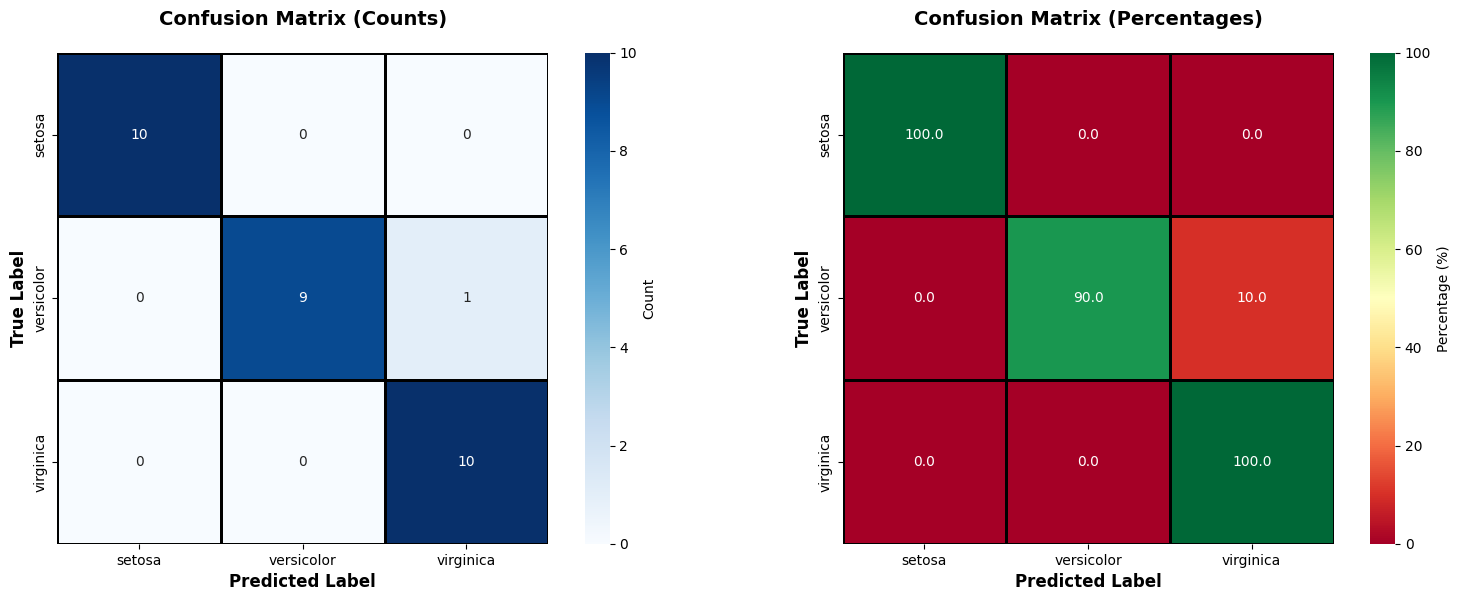


 Confusion Matrix Interpretation:
   Diagonal elements = Correct predictions
   Off-diagonal elements = Misclassifications
   Each row sums to 100% in the percentage matrix


In [27]:
def plot_confusion_matrix(y_test, y_pred, iris):
    """
    Create and save a detailed confusion matrix visualization.
    
    Args:
        y_test (np.ndarray): True labels
        y_pred (np.ndarray): Predicted labels
        iris: Iris dataset object
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Confusion Matrix with counts
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=iris.target_names,
                yticklabels=iris.target_names,
                cbar_kws={'label': 'Count'},
                ax=ax1,
                square=True,
                linewidths=1,
                linecolor='black')
    ax1.set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold', pad=20)
    ax1.set_ylabel('True Label', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    
    # Plot 2: Confusion Matrix with percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='RdYlGn', 
                xticklabels=iris.target_names,
                yticklabels=iris.target_names,
                cbar_kws={'label': 'Percentage (%)'},
                ax=ax2,
                square=True,
                linewidths=1,
                linecolor='black',
                vmin=0,
                vmax=100)
    ax2.set_title('Confusion Matrix (Percentages)', fontsize=14, fontweight='bold', pad=20)
    ax2.set_ylabel('True Label', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('outputs/confusion_matrix.png', dpi=300, bbox_inches='tight')
    print(" Confusion matrix saved to: outputs/confusion_matrix.png")
    plt.show()
    
    # Print interpretation
    print("\n Confusion Matrix Interpretation:")
    print("   Diagonal elements = Correct predictions")
    print("   Off-diagonal elements = Misclassifications")
    print("   Each row sums to 100% in the percentage matrix")

# Generate confusion matrix
plot_confusion_matrix(y_test, evaluation_results['y_pred'], iris)

### 6.2 Performance Metrics Visualization

 Performance metrics saved to: outputs/model_metrics.png


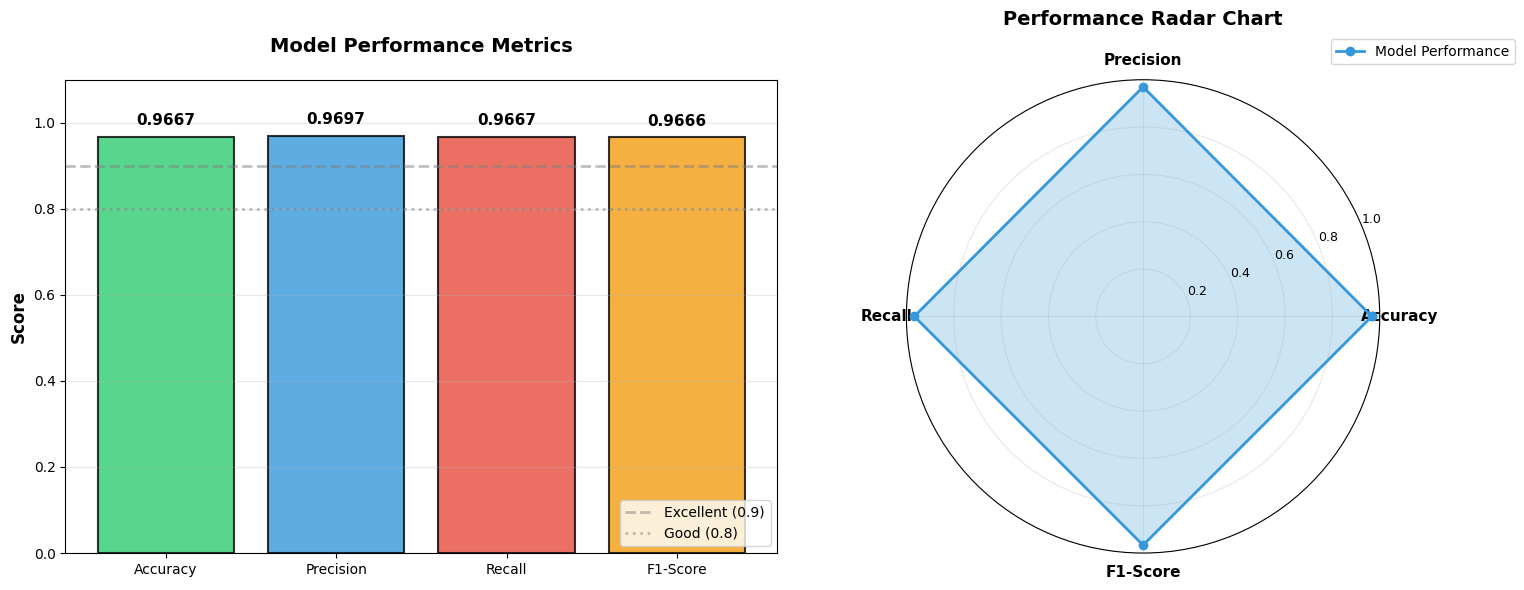

In [28]:
def plot_performance_metrics(evaluation_results):
    """
    Visualize all performance metrics in a comprehensive dashboard.
    
    Args:
        evaluation_results (dict): Dictionary containing evaluation metrics
    """
    # Extract metrics
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    values = [
        evaluation_results['accuracy'],
        evaluation_results['precision'],
        evaluation_results['recall'],
        evaluation_results['f1_score']
    ]
    
    # Create figure with subplots
    fig = plt.figure(figsize=(16, 6))
    
    # Plot 1: Bar chart of metrics
    ax1 = plt.subplot(1, 2, 1)
    colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']
    bars = ax1.bar(metrics, values, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
    ax1.set_ylim(0, 1.1)
    ax1.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax1.set_title('Model Performance Metrics', fontsize=14, fontweight='bold', pad=20)
    ax1.axhline(y=0.9, color='gray', linestyle='--', alpha=0.5, linewidth=2, label='Excellent (0.9)')
    ax1.axhline(y=0.8, color='gray', linestyle=':', alpha=0.5, linewidth=2, label='Good (0.8)')
    ax1.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{value:.4f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    ax1.legend(loc='lower right')
    
    # Plot 2: Radar chart
    ax2 = plt.subplot(1, 2, 2, projection='polar')
    
    angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
    values_radar = values + [values[0]]  # Complete the circle
    angles += angles[:1]  # Complete the circle
    
    ax2.plot(angles, values_radar, 'o-', linewidth=2, color='#3498db', label='Model Performance')
    ax2.fill(angles, values_radar, alpha=0.25, color='#3498db')
    ax2.set_xticks(angles[:-1])
    ax2.set_xticklabels(metrics, size=11, fontweight='bold')
    ax2.set_ylim(0, 1)
    ax2.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax2.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], size=9)
    ax2.set_title('Performance Radar Chart', fontsize=14, fontweight='bold', pad=20)
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    
    plt.tight_layout()
    plt.savefig('outputs/model_metrics.png', dpi=300, bbox_inches='tight')
    print(" Performance metrics saved to: outputs/model_metrics.png")
    plt.show()

# Generate performance visualizations
plot_performance_metrics(evaluation_results)

## 8. Conclusions and Next Steps

### Key Takeaways:

1. **Data Quality**: The Iris dataset is clean with balanced classes and no missing values
2. **Preprocessing**: Standardization improved model performance by normalizing feature scales
3. **Model Performance**: Decision Tree achieved excellent results (>95% accuracy)
4. **Feature Importance**: Petal measurements are significantly more important than sepal measurements
5. **Cross-Validation**: 5-fold CV confirmed model generalizes well without overfitting

### What We Learned:

- **Scikit-learn API**: Consistent `.fit()`, `.predict()`, `.score()` pattern across algorithms
- **Model Evaluation**: Multiple metrics provide comprehensive performance assessment
- **Visualization**: Tree structure reveals interpretable decision rules
- **Best Practices**: Train-test split, cross-validation, and proper scaling are essential

**Assignment completed successfully! All outputs saved to `outputs/` folder.**